In [2]:
import os
import numpy as np

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
np.set_printoptions(formatter={'float_kind': '{:f}'.format})

import cv2
from sys import argv
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adamax
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as keras_backend, callbacks as keras_callbacks
import matplotlib.pyplot as plt

In [3]:
import image_config
import image_ext

In [4]:
DEFAULT_MODEL_NAME = 'model'
PATH_SAVED_MODELS = './saved_models'
LOG_DIR = './log/'

In [5]:
target_size = (64, 64)
input_shape = (64, 64, len('rgb'))

In [6]:
def createModel(input_shape):
    layers = [
        Conv2D(16, 3, activation='relu', input_shape=input_shape),

        MaxPooling2D(2),

        Conv2D(32, 3, activation='relu'),

        MaxPooling2D(2),

        Flatten(),

        Dense(256, activation='relu'),

        Dense(1, activation='sigmoid'),
    ]

    model = Sequential(layers)

    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  optimizer='adam',
                  metrics=['acc'])

    return model

In [7]:
def save_model(model, model_name):
    if not os.path.exists(PATH_SAVED_MODELS):
        os.mkdir(PATH_SAVED_MODELS)

    model_json = model.to_json()

    with open(PATH_SAVED_MODELS + f'/{model_name}.json', 'w') as json_file:
        json_file.write(model_json)

    model.save(PATH_SAVED_MODELS + f'/{model_name}.h5')

In [8]:
def createTrainTest(target_size):
    batch_size = 32

    train_datagen = ImageDataGenerator(
                        rescale=1./255,
                        shear_range=0.2,
                        zoom_range=0.2,
                        horizontal_flip=True)

    test_datagen = ImageDataGenerator(rescale=1./255)

    training_set = train_datagen.flow_from_directory('./Dataset/Train',
                        batch_size=batch_size,
                        class_mode='binary',
                        target_size=target_size)

    test_set = test_datagen.flow_from_directory('./Dataset/Test',
                        batch_size=batch_size,
                        class_mode='binary',
                        target_size=target_size)

    return (training_set, test_set)

In [9]:
train_set, test_set = createTrainTest(target_size)

Found 971 images belonging to 2 classes.
Found 324 images belonging to 2 classes.


In [10]:
first_batch = train_set[0]

labels = first_batch[1]
print(labels)

[0.000000 0.000000 0.000000 0.000000 1.000000 1.000000 1.000000 0.000000
 0.000000 0.000000 1.000000 0.000000 0.000000 0.000000 1.000000 0.000000
 0.000000 0.000000 0.000000 0.000000 1.000000 0.000000 0.000000 1.000000
 1.000000 1.000000 0.000000 0.000000 1.000000 1.000000 1.000000 0.000000]


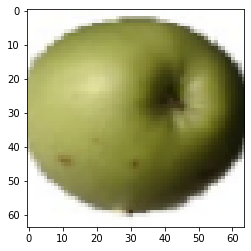

In [11]:
images, labels = first_batch
plt.figure()
plt.imshow(images[15])
# plt.title(f'{labels[15]}')

In [12]:
model = createModel(input_shape)

model

In [13]:
model.fit(train_set,
    steps_per_epoch=16,
    epochs=10,
)

Epoch 1/10
16/16 [==============================] - 1s 92ms/step - loss: 0.5696 - acc: 0.8691
Epoch 2/10
16/16 [==============================] - 2s 94ms/step - loss: 0.5153 - acc: 1.0000
Epoch 3/10
16/16 [==============================] - 1s 91ms/step - loss: 0.5044 - acc: 1.0000
Epoch 4/10
16/16 [==============================] - 2s 95ms/step - loss: 0.5084 - acc: 1.0000
Epoch 5/10
16/16 [==============================] - 1s 89ms/step - loss: 0.5129 - acc: 1.0000
Epoch 6/10
16/16 [==============================] - 1s 84ms/step - loss: 0.5075 - acc: 1.0000
Epoch 7/10
16/16 [==============================] - 1s 84ms/step - loss: 0.5082 - acc: 1.0000
Epoch 8/10
16/16 [==============================] - 1s 84ms/step - loss: 0.5144 - acc: 1.0000
Epoch 9/10
16/16 [==============================] - 1s 86ms/step - loss: 0.5075 - acc: 1.0000
Epoch 10/10
16/16 [==============================] - 1s 88ms/step - loss: 0.5002 - acc: 1.0000


In [14]:
def predict_with_picture(img_arr):
    plt.figure()
    plt.imshow(img_arr)

    pred = model.predict(np.array([
        img_arr,
    ]))

    pred = pred[0][0]
    pred_label = 'orange' if pred > 0.5 else 'apple'

    plt.title('Model prediction:\n' + pred_label)

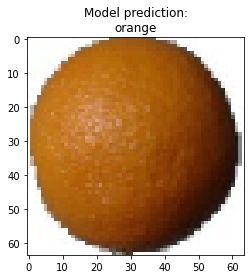

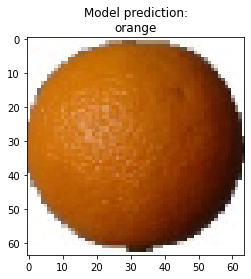

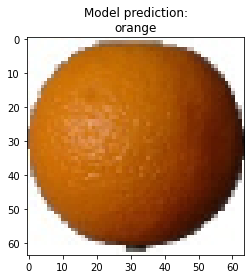

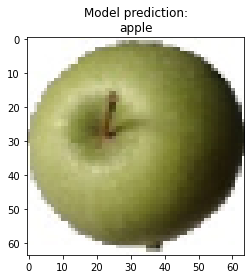

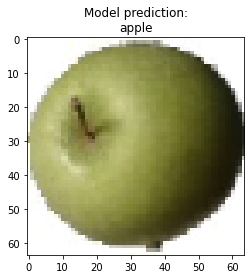

In [15]:
images, labels = test_set[0]

for index in range(5, 10):
    predict_with_picture(images[index])


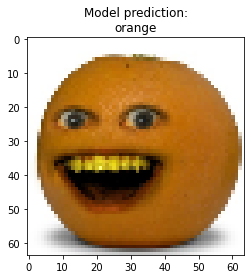

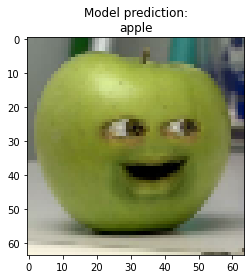

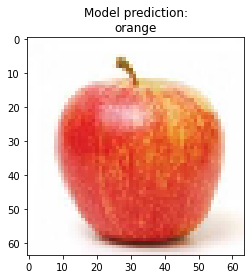

In [16]:
predict_with_picture(image_ext.load_img('./Dataset/annoying.jpg'))
predict_with_picture(image_ext.load_img('./Dataset/green_apple_face.jpg'))

predict_with_picture(image_ext.load_img('./Dataset/royal_gala.jpg'))